In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

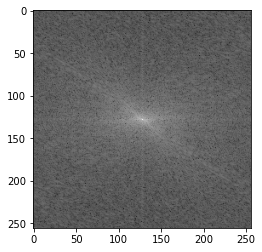

In [7]:
path = "F:/4.1/CSE 4128 Image Lab/lab3/pics/Lena.jpg"

I = cv2.imread(path, 0)
I = np.float32(I)
M, N = I.shape
I = I + 1
I_log = np.log(I)
I_fft = np.fft.fft2(I_log)
I_fft_shift = np.fft.fftshift(I_fft)
plt.imshow(np.log(np.abs(I_fft_shift)), "gray")
plt.show()

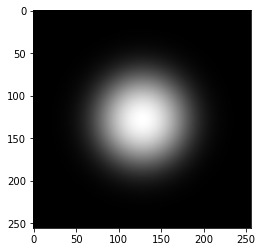

In [32]:
H = np.zeros(I.shape)
GL = 0.5
GH = 2
c = 0.5
D0 = 30
for u in range(M):
    for v in range(N):
        H[u, v] = (GH-GL)*(1-np.exp(-c*(np.sqrt((u-M/2)**2+(v-N/2)**2))**2/(D0**2)))+GL
plt.imshow(np.log(np.abs(H)), "gray")
plt.show()

In [33]:
I_FT2 = I_fft*(H)
I_fft_i2 = np.fft.ifft2(I_FT2)
back2org2 = np.exp(np.abs(I_fft_i2))-1
print(back2org2)

[[12.68585821 11.36637597 11.60233214 ... 11.85189784 12.37300858
   9.6550862 ]
 [11.26774208 11.94729488 11.57590952 ... 12.51384229 11.74321756
  10.72626437]
 [11.94208682 11.55828276 11.62048497 ... 10.92406611 10.12472801
   6.95248354]
 ...
 [ 6.03835204  6.07702561  6.22623571 ...  8.44836808  8.55402537
   8.59495258]
 [ 5.96603444  5.98952703  6.20302252 ...  8.94131119  9.16513073
   8.52227813]
 [ 5.20739838  6.25566406  6.27309361 ...  9.27828872  9.10192013
  10.15860531]]


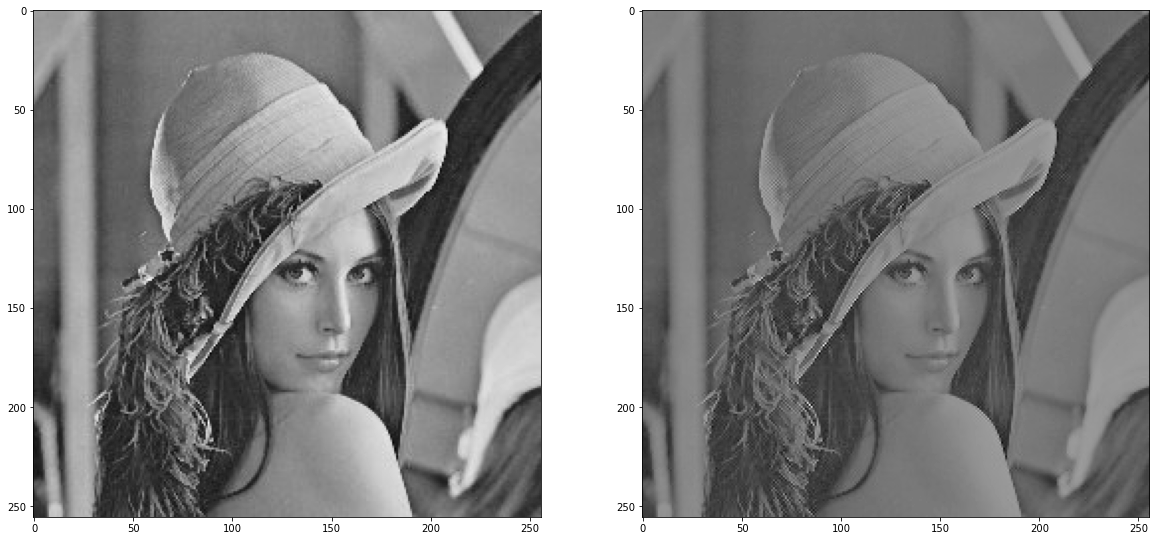

In [34]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(I, "gray")
fig.add_subplot(1,2,2)
plt.imshow(back2org2, "gray")
plt.show()